In [ ]:
from excel_pandas.libro import LibroPandas
from excel_pandas.hoja import HojaPandas
from excel_pandas.hoja_semantica import HojaSemantica  
import pandas as pd

# Paso 1: Crear el libro desde un archivo .bib
libro = LibroPandas.desde_bib("data/articulos.bib", nombre_hoja="BibTeX")

# Paso 2: Mostrar resumen del libro
print(libro)

# Paso 3 (opcional): Obtener una hoja específica y hacer limpieza extra si quieres
hoja = libro.obtener_hoja("BibTeX")
hoja.limpiar_columnas_latex(["Title", "Author(s)"])  # Puedes repetir si hiciste cambios
hoja.tipificar_columnas()

print(hoja)

⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/bryant-et-al-diversity-and-activity-of-communities-inhabiting-plastic-debris-in-the-north-pacific-gyre.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/ijms-25-00593.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/1-s2.0-S0304389421012036-main.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/1-s2.0-S0048969721016582-main.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/1-s2.0-S0013935123009027-main.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/1-s2.0-S0013935124020474-main.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T040616Z-001/Articulos/polymers-09-00065.pdf'
⚠️ Archivo no encontrado: 'home/enrique/Downloads/Articulos-20250418T0406

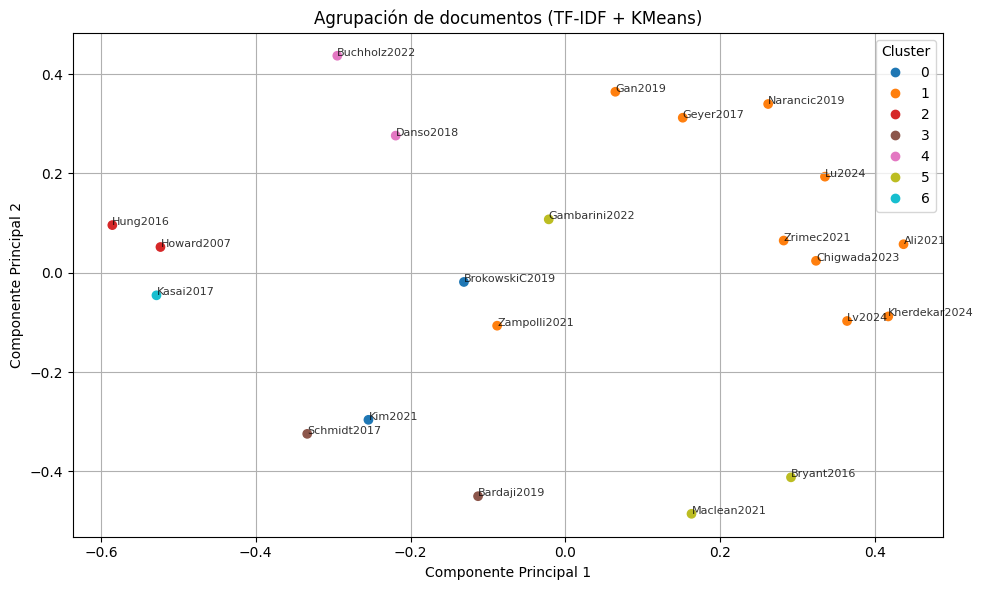

In [2]:
# Paso 4: Convertir la hoja en una hoja semántica
hoja_sem = HojaSemantica(hoja.copy(), nombre="ClusterTFIDF")

# Paso 5: Ejecutar análisis semántico
hoja_sem.analizar_texto(columna="Abstract", n_clusters=7)

# Paso 6: Graficar agrupación de documentos
hoja_sem.graficar_clusters()



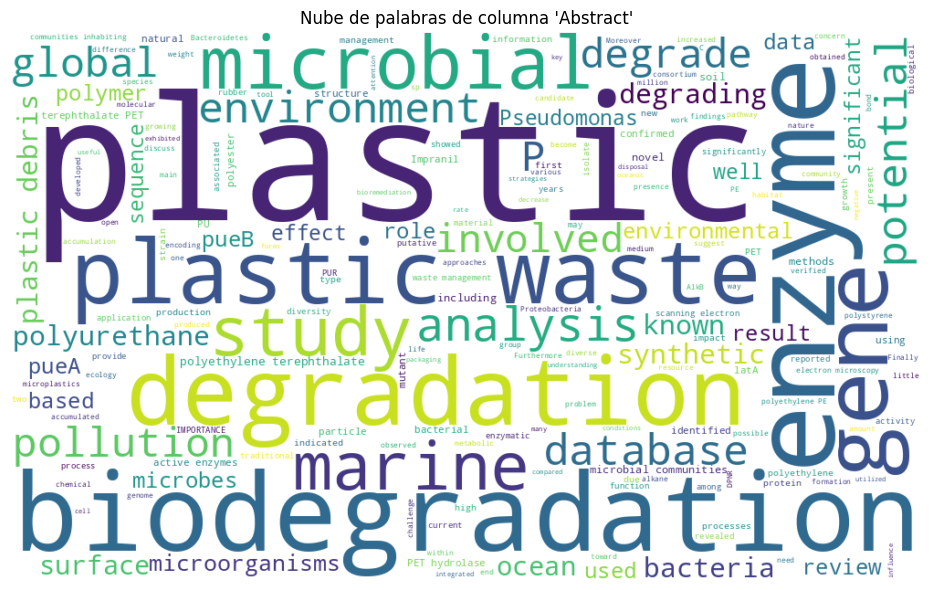

In [5]:
# Paso 7: Nube de palabras
hoja_sem.nube_palabras()


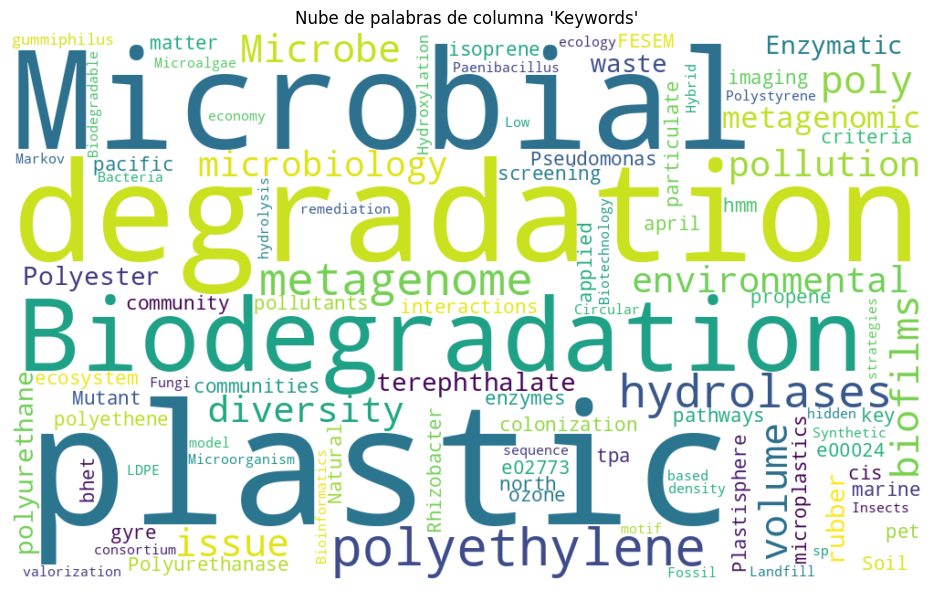

In [6]:

hoja_sem.nube_palabras(columna="Keywords")

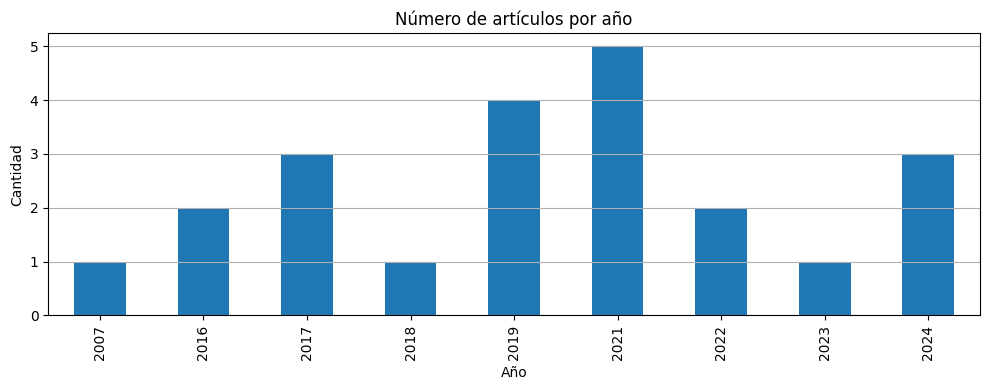

In [7]:
# Paso 8: Gráfico de artículos por año
hoja_sem.graficar_articulos_por_anio(columna="Year")

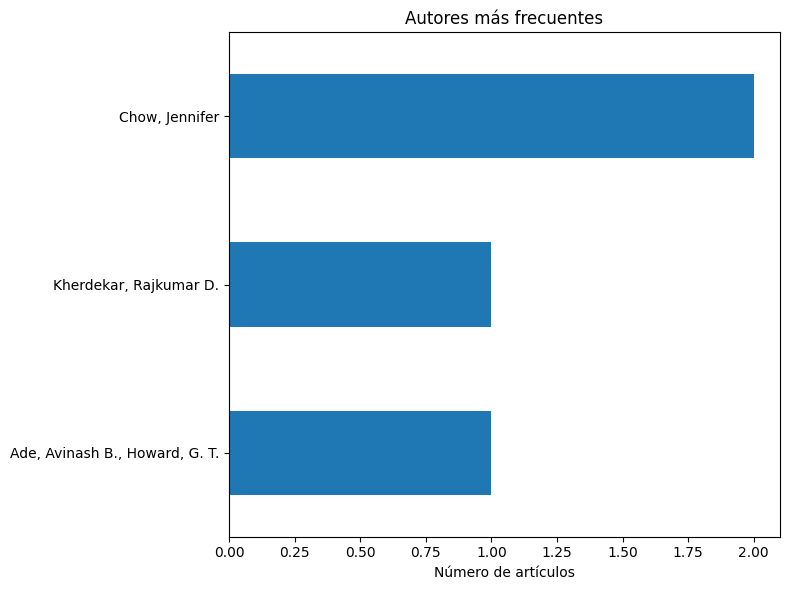

In [9]:
# Paso 9: Autores más frecuentes
hoja_sem.graficar_autores_frecuentes(columna="Author(s)", top_n=3)

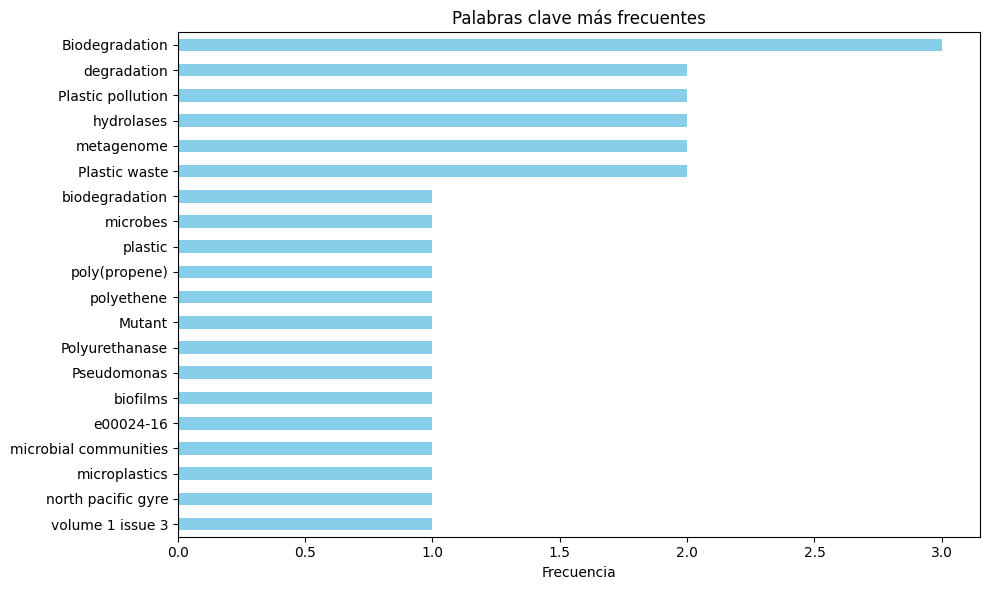

In [10]:
# Paso 10: Palabras clave más comunes
hoja_sem.graficar_frecuencia_keywords(columna="Keywords")

In [11]:
# Paso 7: Agregar la hoja semántica al libro y guardar
libro.agregar_hoja("ClusterTFIDF", hoja_sem)
libro.guardar_como_excel("data/articulos_limpios.xlsx")

In [11]:
hoja.tipificar_columnas()

In [3]:
#hoja = libro.obtener_hoja("BibTeX")
#print(hoja)
hoja.dtypes

ID             object
Type           object
Title          object
Author(s)      object
Year            Int64
Journal        object
Volume         object
Number         object
Pages          object
Page Count      Int64
DOI            object
URL            object
Keywords       object
Abstract       object
Publisher      object
ISSN           object
KeywordList    object
dtype: object

In [4]:
hoja.KeywordList[4]

['Biofilms',
 'FESEM imaging',
 'Microbe–plastic interactions',
 'Microbial diversity',
 'Plastic pollution',
 'Plastisphere',
 'Polyethylene colonization',
 'Soil microbial community']

In [12]:
print(libro.obtener_hoja("BibTeX").dtypes)


ID             object
Type           object
Title          object
Author(s)      object
Year            Int64
Journal        object
Volume         object
Number         object
Pages          object
Page Count      Int64
DOI            object
URL            object
Keywords       object
Abstract       object
Publisher      object
ISSN           object
KeywordList    object
dtype: object


In [13]:
libro.guardar_como_excel("articulos_limpios.xlsx")


In [3]:
!pip install pandas bibtexparser openpyxl
!pip install pymupdf
!pip install wordcloud scikit-learn matplotlib




[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 1.4 MB/s eta 0:00:001.4 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


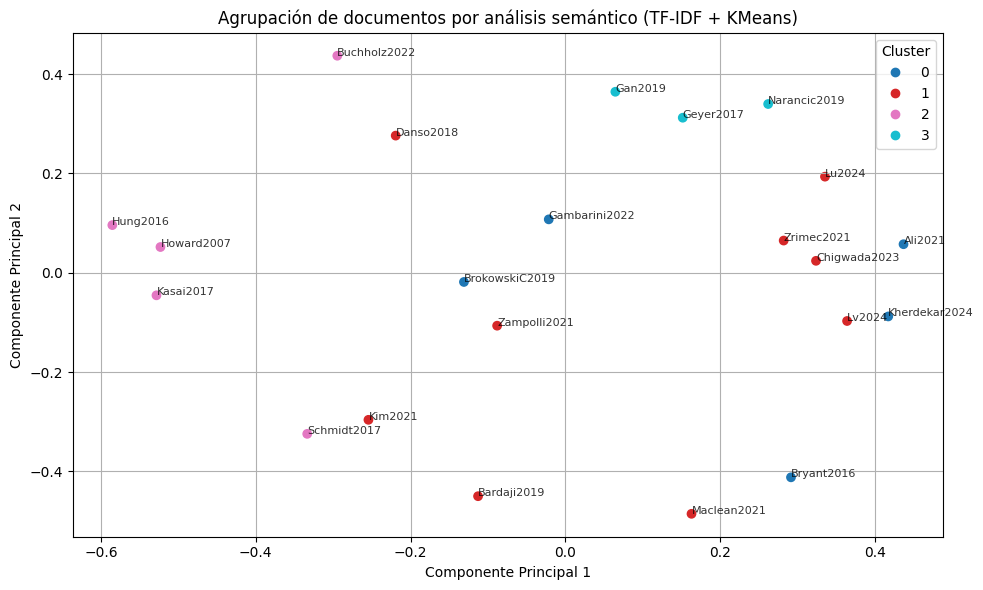

✅ Análisis completado. Resultados guardados en 'resumen_clusterizado.csv' y 'clusters.png'


In [2]:
# Crear un archivo Python básico para análisis semántico con TF-IDF y KMeans clustering

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Leer archivo (modifica el nombre del archivo si es necesario)
#df = pd.read_excel("Resumen.ods", engine="odf")

# 2. Seleccionar la columna que quieres analizar (ej. 'Insights' o 'Conclusions')
columna_texto = 'Abstract'  # Puedes cambiarlo a 'Conclusions', 'Methods Used', etc.
textos = hoja[columna_texto].dropna().astype(str)

# 3. Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=3)
X = vectorizer.fit_transform(textos)

# 4. Clustering con KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# 5. Agregar clusters al DataFrame original
df = hoja.loc[textos.index]
df['Cluster'] = clusters

# 6. Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10')
plt.title("Agrupación de documentos por análisis semántico (TF-IDF + KMeans)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# Mostrar etiquetas (ID) en negro
for i, txt in enumerate(df["ID"].values):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, color="black", alpha=0.8)

plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.savefig("clusters.png")
plt.show()


# 7. Guardar resultados
df.to_csv("resumen_clusterizado.csv", index=False)
print("✅ Análisis completado. Resultados guardados en 'resumen_clusterizado.csv' y 'clusters.png'")


In [ ]:
print(vectorizer)

In [ ]:
!pip install odfpy
